In [1]:
import os
import numpy as np
import cv2 as cv
import pandas as pd

In [3]:
data = pd.read_csv('./dataset.csv', names=['path', 'class'])
data

,path,class
0,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
1,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
2,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
3,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
4,/Users/avdhantyagi/DISK/notebook/Dataset/Land/...,Land
...,...,...
28209,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28210,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28211,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small
28212,/Users/avdhantyagi/DISK/notebook/Dataset/Land-...,Land-small


In [4]:
index_for_classes=[]
count = 0
classes = data['class'].unique()
j = ""
for i in range(len(data['class'])):
    if (data['class'][i] != j):
        index_for_classes.append([data['class'][i],i])
        j = data['class'][i]

In [5]:
index_for_classes.append(['end',28214])
index_for_classes

[['Land', 0],
 ['Buildings', 2340],
 ['Tools', 2662],
 ['Store event', 4107],
 ['Snails and shells', 4319],
 ['Clo-occ', 4413],
 ['Bath Baby', 5749],
 ['Auto', 6099],
 ['Flowers', 7653],
 ['Prints', 7723],
 ['Reptiles', 7962],
 ['Nature', 9204],
 ['Daily', 9669],
 ['Sports', 11480],
 ['Utilities', 11879],
 ['Instruments', 13161],
 ['Architecture', 13646],
 ['Signs', 14653],
 ['Vegetation', 14723],
 ['Food', 15155],
 ['Insects', 16941],
 ['Birds', 18441],
 ['Sea', 20424],
 ['Fish', 21179],
 ['Random Objects', 21989],
 ['Land-small', 22191],
 ['end', 28214]]

In [6]:
while(1):
    path = input("Enter Valid Image path: ")
    if(os.path.exists(path) == False) :
        continue
    break
image = cv.imread(path)

In [7]:
classes = ['Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects']
while(1):
    
    ui_class = input('enter class name : ')
    if ui_class not in classes:
        print("enter one of these 'Land', 'Buildings', 'Tools', 'Store event', 'Clo-occ', 'Bath Baby', 'Auto', 'Flowers', 'Prints', 'Reptiles', 'Nature', 'Daily', 'Sports', 'Utilities', 'Instruments', 'Architecture', 'Signs', 'Vegetation', 'Food', 'Insects', 'Birds', 'SnailsShells', 'Sea', 'Fish', 'Land-small', 'RandomObjects'")
        continue
    break

In [8]:
start = 0
end = 0
for i in range(len(index_for_classes)):
    if(ui_class == index_for_classes[i][0]):
        start = index_for_classes[i][1]
        end = index_for_classes[i+1][1]

print(start, end)

6099 7653


In [9]:
from skimage.metrics import structural_similarity
import cv2
import numpy as np

u_img = cv.imread(path)
u_img = cv2.cvtColor(u_img, cv2.COLOR_BGR2GRAY)

ssimarr = []
# before_gray = cv2.cvtColor(u_img, cv2.COLOR_BGR2GRAY)
for i in range(start,end):
    ximg = cv.imread(data['path'][i])
    ximg = cv2.cvtColor(ximg, cv2.COLOR_BGR2GRAY)
    (score, diff) = structural_similarity(u_img, ximg, full=True)
    ssimarr.append([score,data['path'][i]])

len(ssimarr)


1554

In [10]:
import operator
ssimarr = sorted(ssimarr, key=operator.itemgetter(0))

[1.0, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/ILSVRC2012_val_00011417.JPEG']
[0.44107043377523597, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04347754_12768.JPEG']
[0.4340972249334231, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02687172_37478.JPEG']
[0.4309455671489753, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02687172_22362.JPEG']
[0.4299804290957875, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04347754_17715.JPEG']
[0.4298135617528019, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n02835271_25268.JPEG']
[0.42945513088541026, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04465501_2677.JPEG']
[0.4268871278884179, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04461696_20144.JPEG']
[0.42402383671212435, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04252077_5308.JPEG']
[0.42400042418790346, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04592741_11028.JPEG']
[0.42387011709733086, '/Users/avdhantyagi/DISK/notebook/Dataset/Auto/n04273569_6010.JPEG']
[0.4

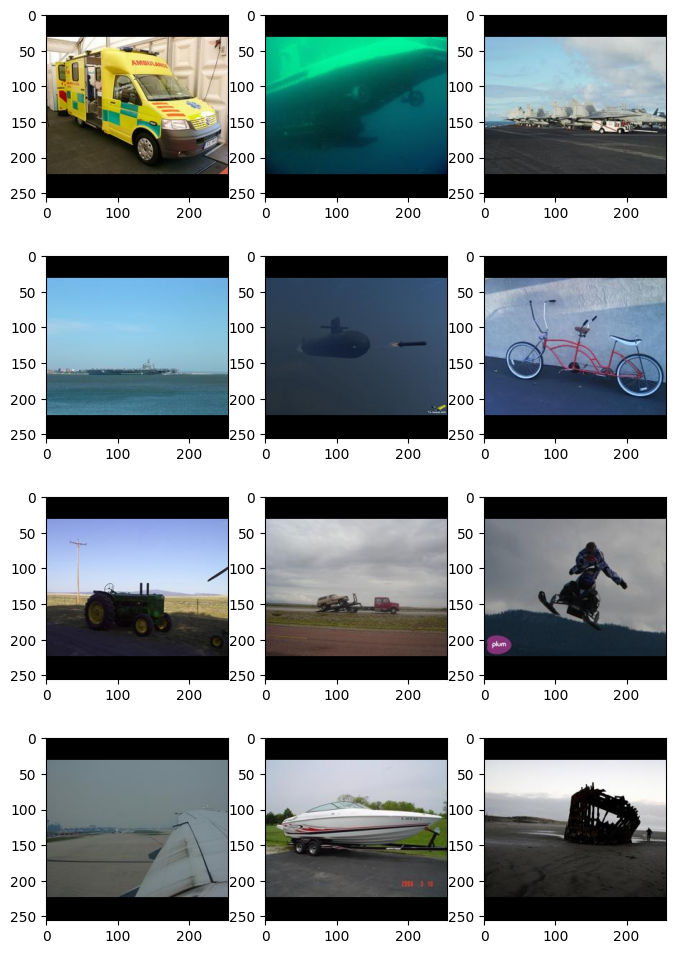

In [16]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8, 12))
rows = 4
columns = 3
for i in range(1,rows*columns+1):
    fig.add_subplot(rows, columns, i)
    plt.imshow(cv.cvtColor(cv.imread(ssimarr[-i][1]), cv.COLOR_BGR2RGB))
    print(ssimarr[-i])
plt.show()

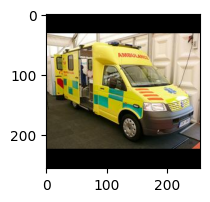

In [12]:
fig = plt.figure(figsize=(3, 2))
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))